# Evaluation of YOLOv7 on Gazebo Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import PIL.Image as Image
from pathlib import Path
from tools.evaluation import plot_ap, plot_precision_recall_curves, parse_evaluation_results, plot_pr


## Load Evaluation Data

In [3]:
kitti_classes = {'Car': 0, 
                 'Pedestrian': 1, 
                 'Van': 2, 
                 'Cyclist': 3, 
                 'Truck': 4, 
                 'Misc': 5, 
                 'Tram': 6, 
                 'Person_sitting': 7}

In [4]:
model_name = 'yolov7'
result_path = Path('../results/yolov7_gazebo/all')

# Parse the result file
detections, ap_scores, precisions, recalls = parse_evaluation_results(result_path, kitti_classes, model_name)

['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!


In [11]:
%matplotlib inline

## Detection Results on Test Dataset

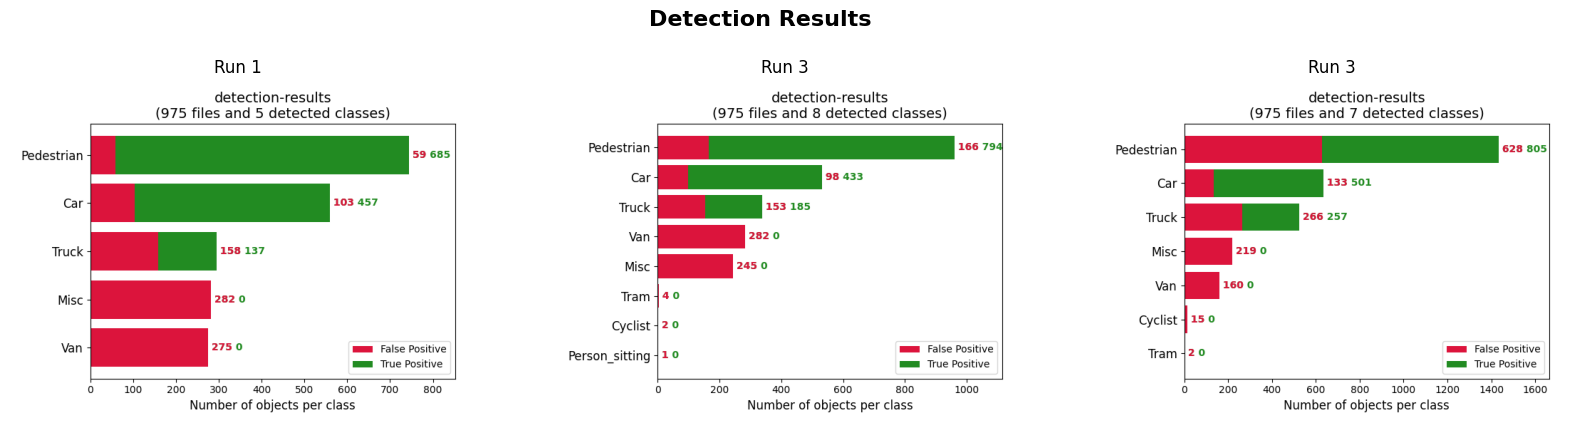

In [19]:
plt.figure(figsize=(20,5))
plt.suptitle("Detection Results", fontsize=16, fontweight='bold')
plt.subplot(1,3,1)
plt.title('Run 1')
plt.imshow(Image.open('assets/gazebo/all/split_1/detection-results-info.png'))
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Run 3')
plt.imshow(Image.open('assets/gazebo/all/split_2/detection-results-info.png'))
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Run 3')
plt.imshow(Image.open('assets/gazebo/all/split_3/detection-results-info.png'))
plt.axis('off')

plt.show()

## Precision and Recall

In [16]:
gazebo_detections = {"Car": detections["Car"], "Pedestrian": detections["Pedestrian"], "Truck": detections["Truck"]}

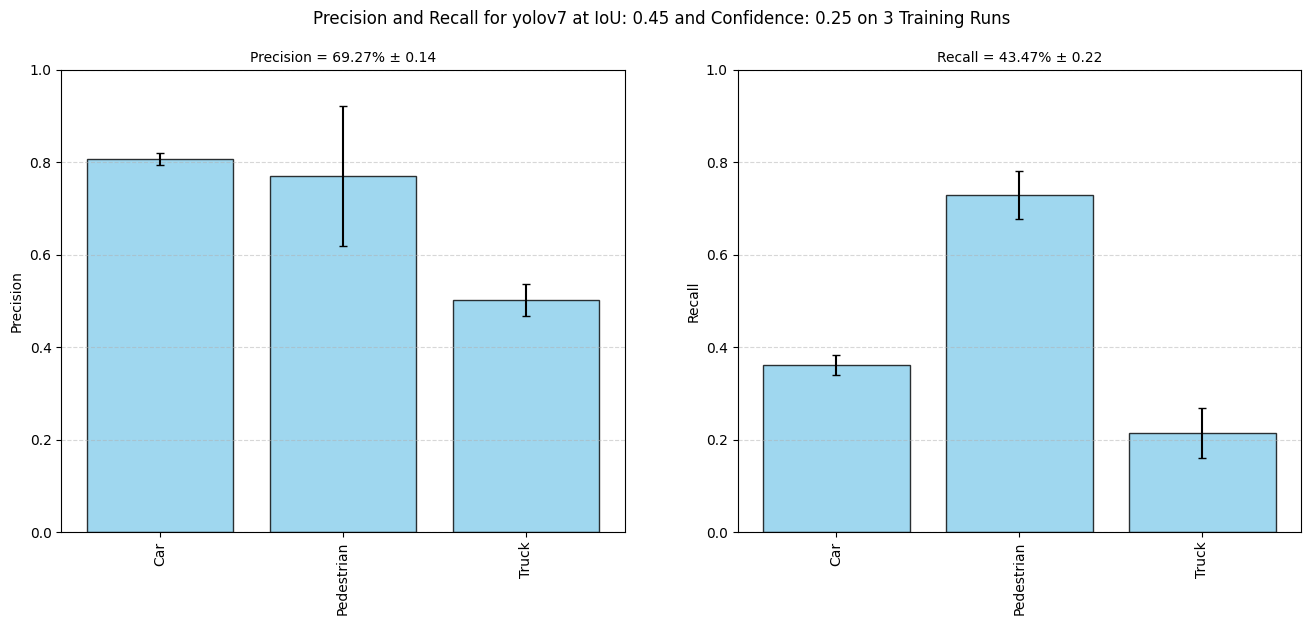

In [17]:
plot_pr(gazebo_detections, model_name=model_name, iou_thres=0.45, conf_thres=0.25)

## Average Precision at IoU 0.5

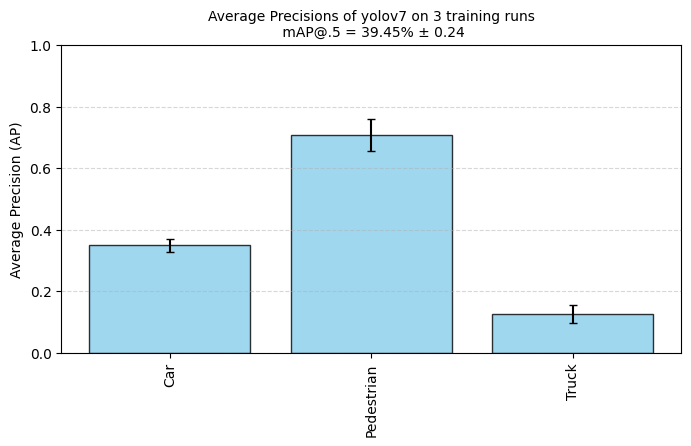

In [7]:
# Plot average precision of all the classes
plot_ap(ap_scores, model_name=model_name)

## Precision Recall Curve

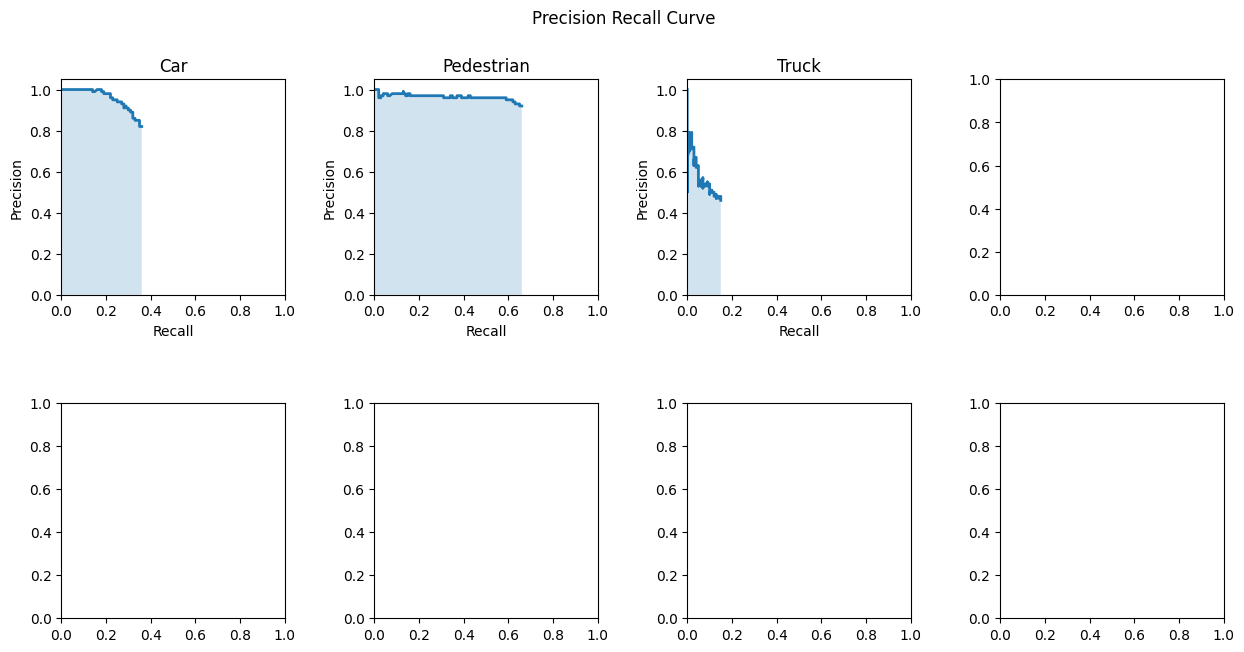

In [8]:
# Plot precision recall curve of each class
# show Area Under Curve (AUC), separate each class
# TEST: Argument 'force_single_result' is for debugging purpose to show only the first evaluation result,
# although there are multiple evaluation results for a model
plot_precision_recall_curves(precisions, recalls, show_auc=True, separate=True, force_single_result=True)           

### Join precision recall curves of each class in a plot 

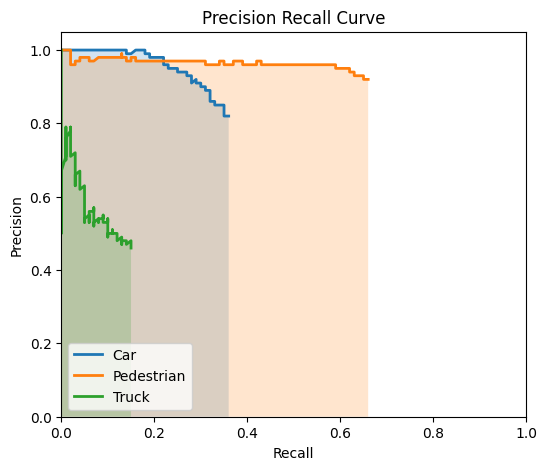

In [9]:
# Plot precision recall curve of each class
plot_precision_recall_curves(precisions, recalls, show_auc=True, separate=False, force_single_result=True)     # show Area Under Curve (AUC) & join all curves of each vlass

### Precision recall curves of each class on 3 training runs

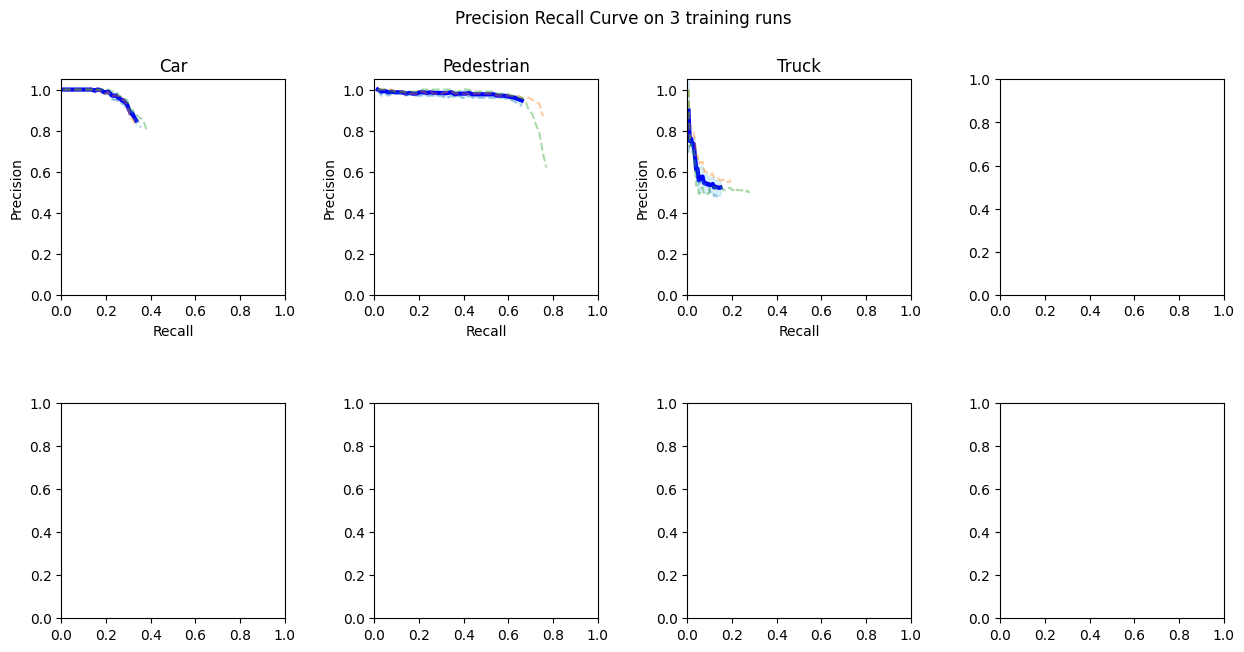

In [11]:
# Plot precision recall curve of each class
plot_precision_recall_curves(precisions, recalls, show_auc=False, separate=True)     # show Area Under Curve (AUC) & join all curves of each vlass

### Precision recall curves of each class with the Area Under Curve (AUC)

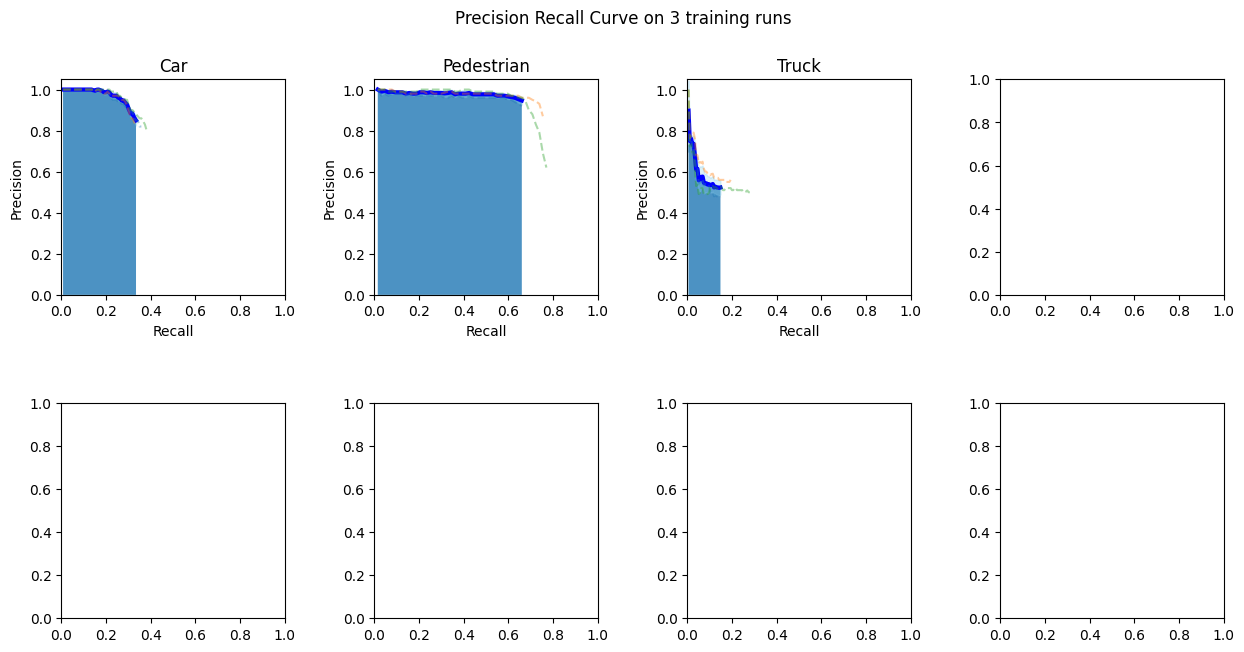

In [12]:
plot_precision_recall_curves(precisions, recalls, show_auc=True, separate=True)     

In [64]:
# plot_f1_curves(precisions, recalls)     

## Evaluation on Different Weather Conditions

In [1]:
from pathlib import Path
from tools.evaluation import parse_evaluation_results
from tools.cross_eval import plot_pr, plot_ap

### Load Evaluation Data

In [2]:
kitti_classes = {'Car': 0, 
                 'Pedestrian': 1, 
                 'Van': 2, 
                 'Cyclist': 3, 
                 'Truck': 4, 
                 'Misc': 5, 
                 'Tram': 6, 
                 'Person_sitting': 7}

In [33]:
model_detections = {}
model_ap_scores = {}
model_precisions = {}
model_recalls = {}

In [34]:
weathers = ["clear", "rain", "fog"]

In [35]:
model_name = 'yolov7'

for weather in weathers:
    result_path = Path(f'../results/yolov7_gazebo/{weather}')
    
    # Parse the result file
    detections, ap_scores, precisions, recalls = parse_evaluation_results(result_path, kitti_classes, model_name)
    
    gazebo_detections = {"Car": detections["Car"], "Pedestrian": detections["Pedestrian"], "Truck": detections["Truck"]}
    
    model_detections[weather] = gazebo_detections
    model_ap_scores[weather] = ap_scores
    model_precisions[weather] = precisions
    model_recalls[weather] = recalls


['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!
['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!
['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!


### Precision and Recall

In [36]:
%matplotlib inline

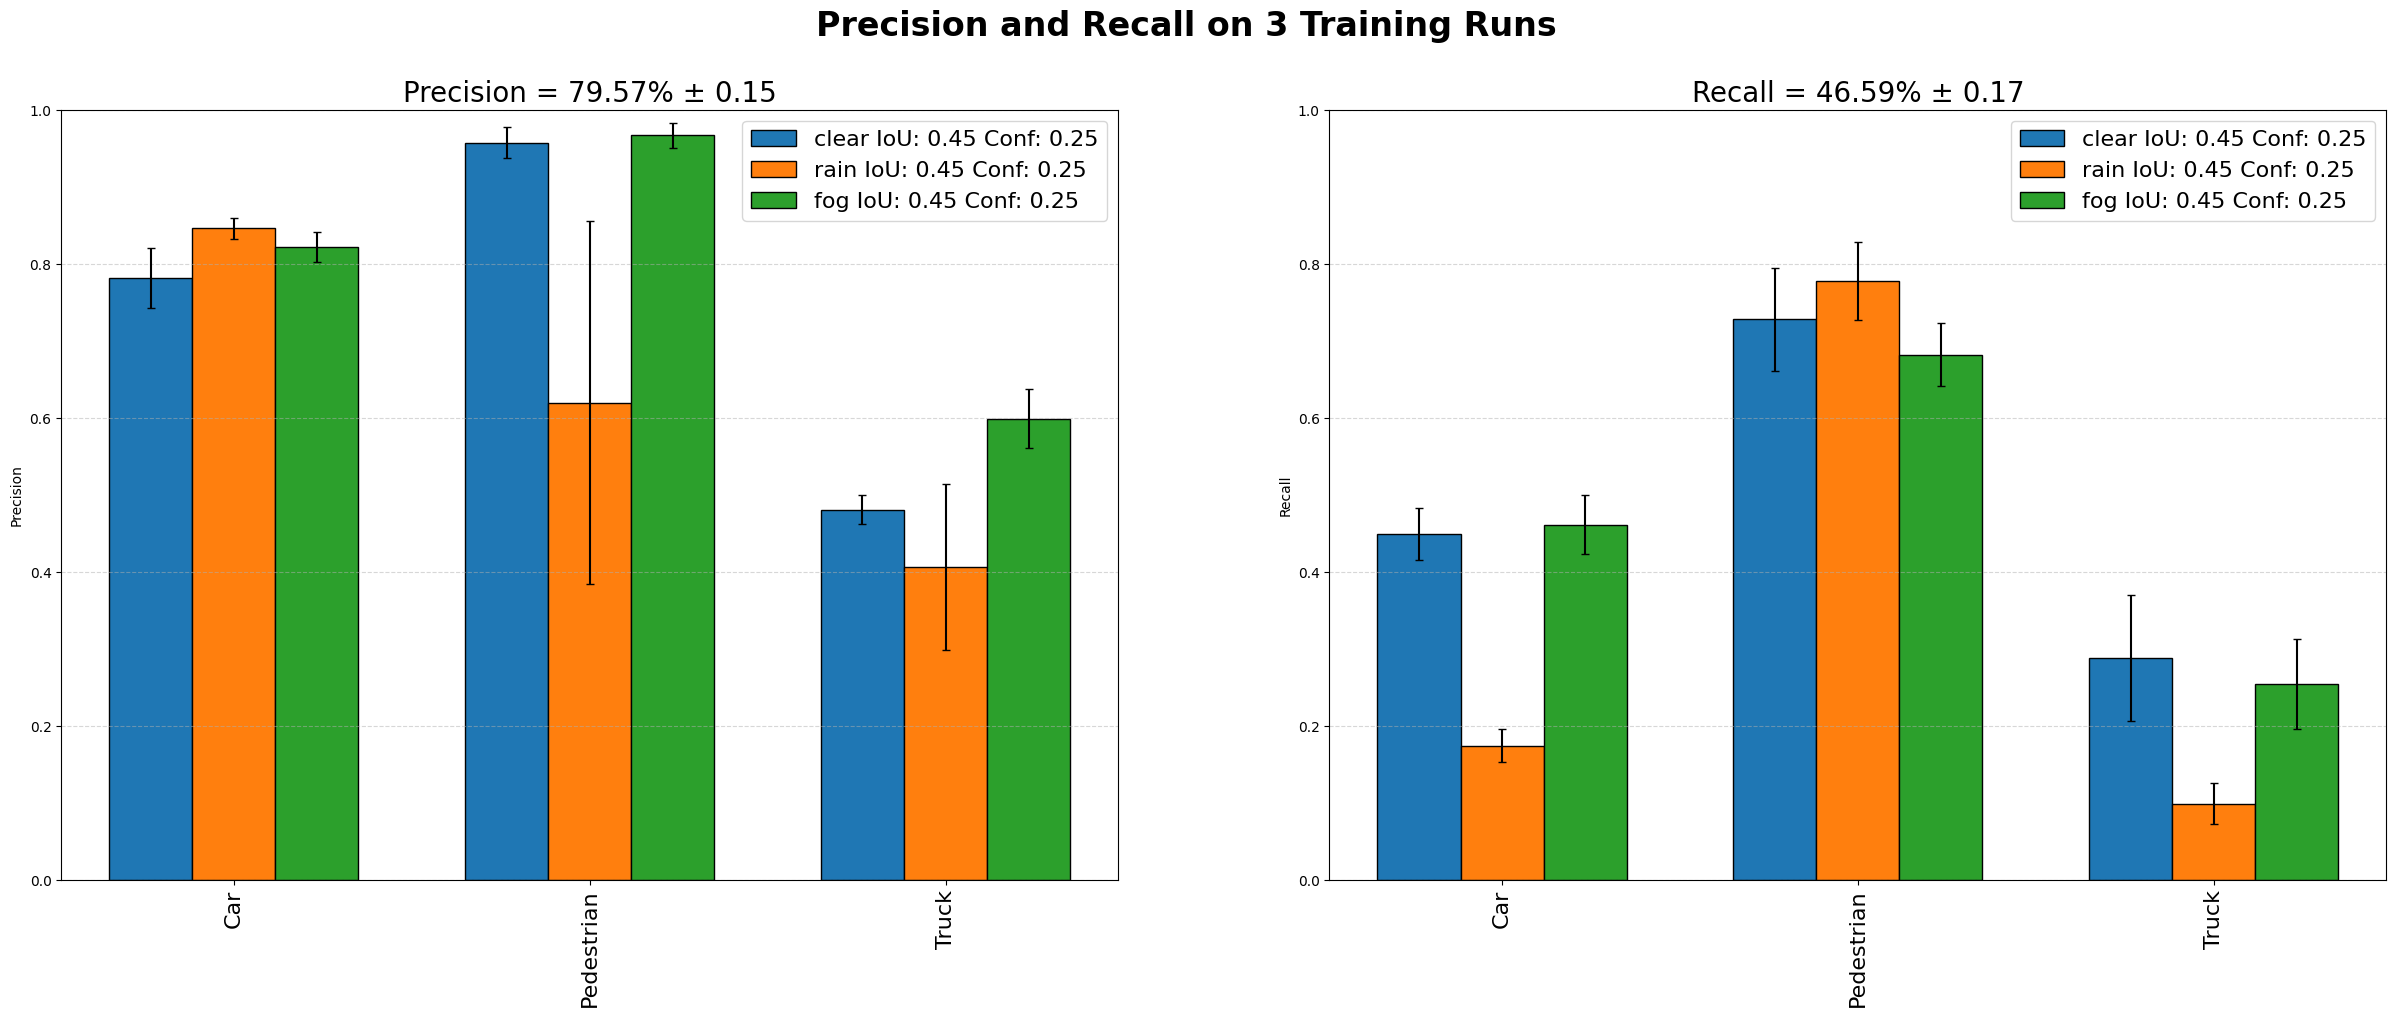

In [37]:
plot_pr(model_detections, iou_thres=[0.45, 0.45, 0.45], conf_thres=[0.25, 0.25, 0.25])

### Average Precision at IoU 0.5

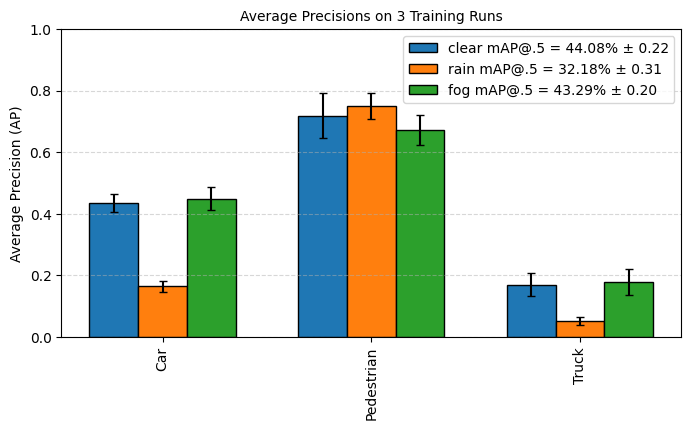

In [38]:
# Plot average precision of all the classes
plot_ap(model_ap_scores)

## Evaluation on Different Time of Day

### Load Evaluation Data

In [3]:
model_detections = {}
model_ap_scores = {}
model_precisions = {}
model_recalls = {}

In [4]:
tods = ["daylight", "cloudy", "sunset", "night"]

In [5]:
model_name = 'yolov7'

for tod in tods:
    result_path = Path(f'../results/yolov7_gazebo/{tod}')
    
    # Parse the result file
    detections, ap_scores, precisions, recalls = parse_evaluation_results(result_path, kitti_classes, model_name)
    
    gazebo_detections = {"Car": detections["Car"], "Pedestrian": detections["Pedestrian"], "Truck": detections["Truck"]}
    
    model_detections[tod] = gazebo_detections
    model_ap_scores[tod] = ap_scores
    model_precisions[tod] = precisions
    model_recalls[tod] = recalls


['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!
['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!
['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!
['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!


### Precision and Recall

In [6]:
%matplotlib inline

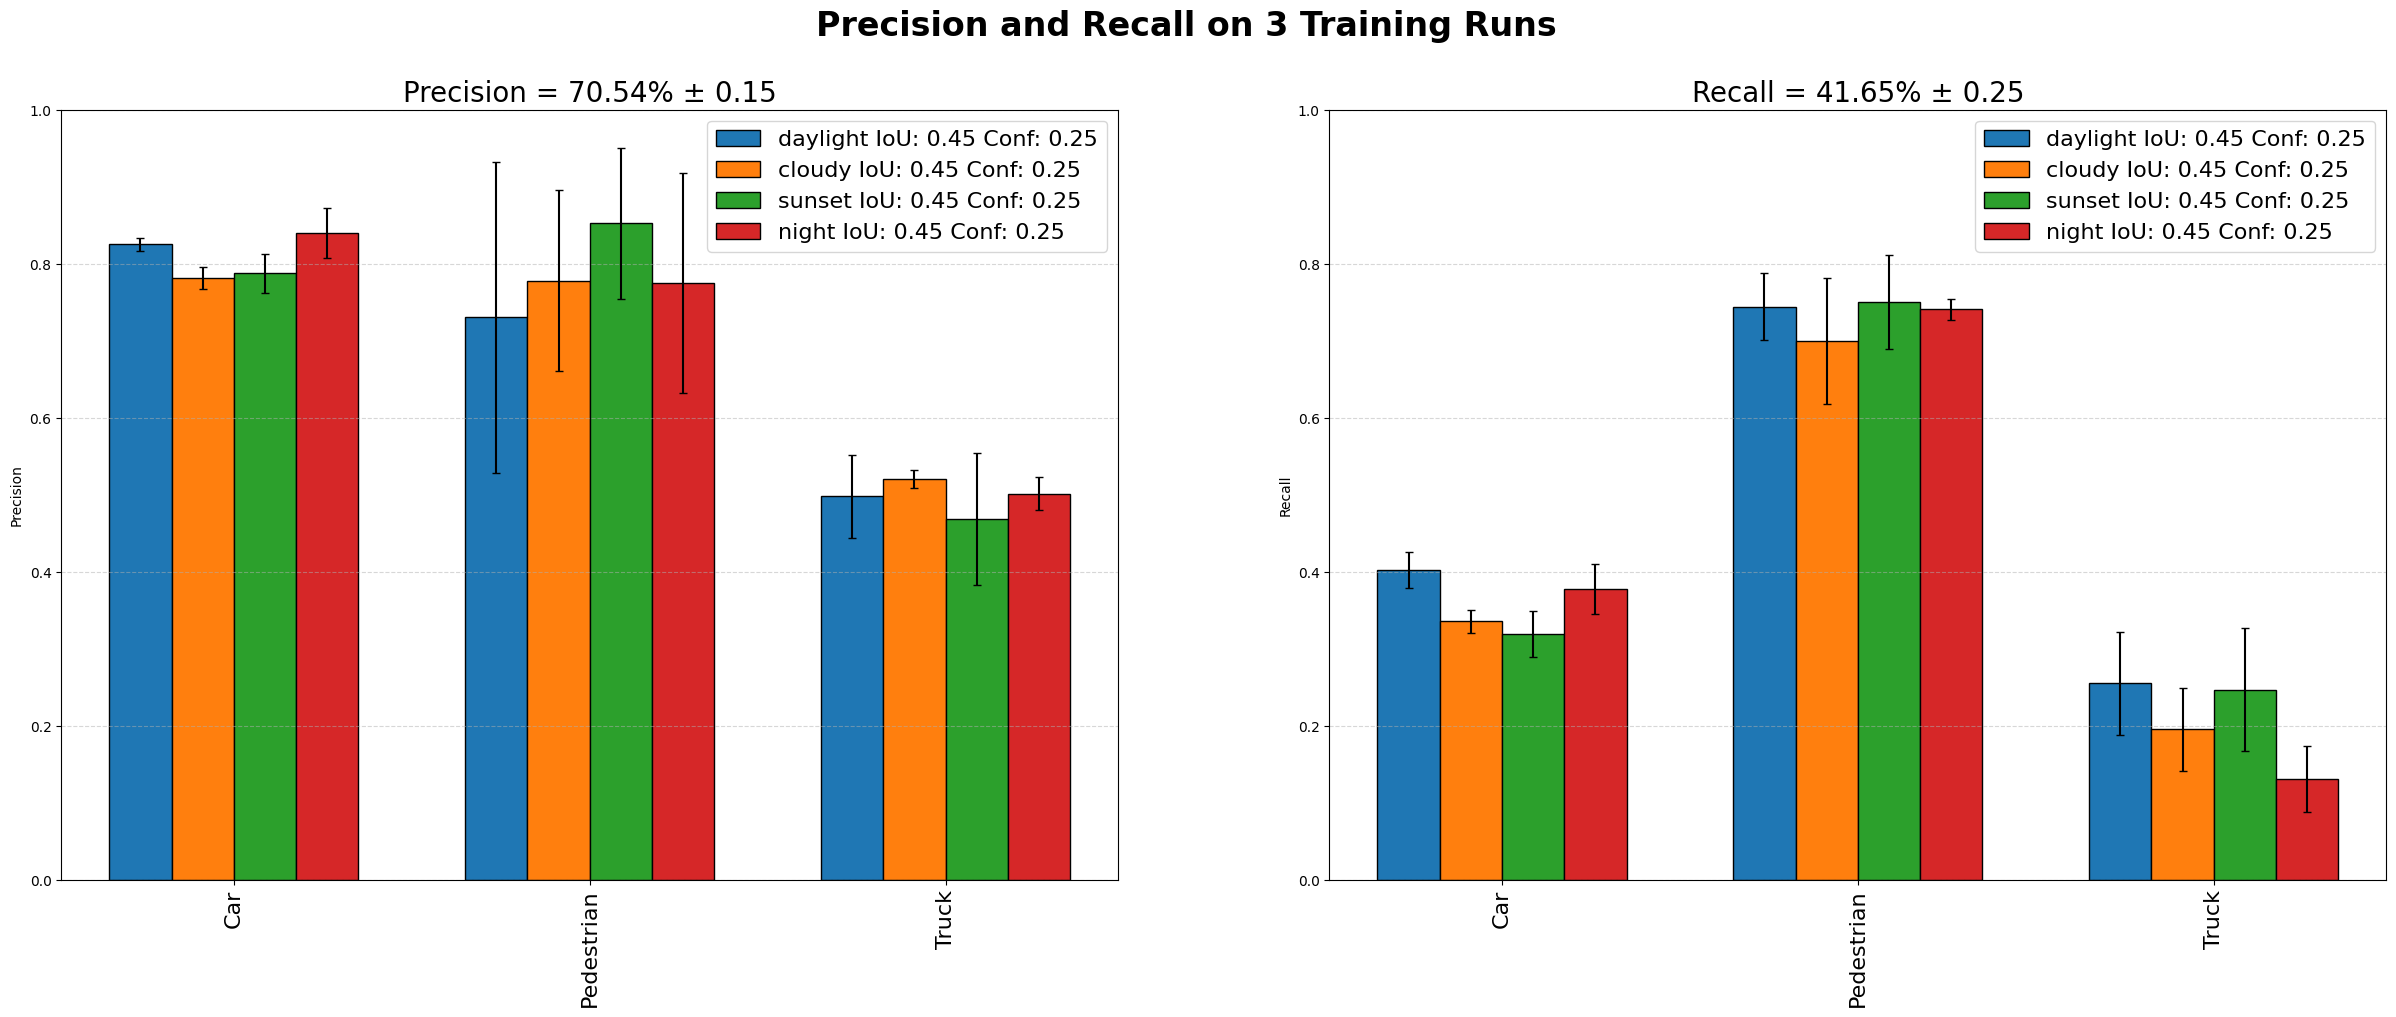

In [7]:
plot_pr(model_detections, iou_thres=[0.45, 0.45, 0.45, 0.45], conf_thres=[0.25, 0.25, 0.25, 0.25])

### Average Precision at IoU 0.5

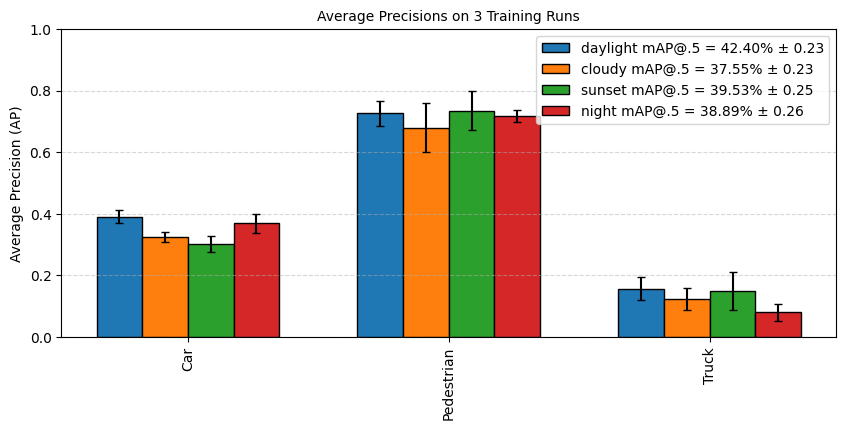

In [8]:
# Plot average precision of all the classes
plot_ap(model_ap_scores)